# Investigation of Titanic Data
## Overview

* The sinking of RMS Titanic is one of the most famous maritime disasters, with 1,517 fatalities. <br> With this dataset I would like to do some investigation trying to find out what factors made people more likely to survive?


## Investigation Phases:
I will go through the following phases to have a basic understading of the question.
* Data Wrangling Phase
* Exploration Phase
* Conclusions Phase




## Read in the data
* Let's read in the dataset first and use ```df.head()``` to get a basic understanding of this dataset, listing column names and some entries.


In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
%pylab inline

df = pd.read_csv('input/titanic-data.csv')
df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

* The meaning of data columned explained, copied from the "data introduction" of the [kaggle competition](https://www.kaggle.com/c/titanic/data) .


| Variable	| Definition	| Key	|
|-----------|---------------|-------|
| survival	| Survival	    | 0 = No, 1 = Yes	 |
| pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd	|
| sex   | 	Sex		|
| Age	| Age | in years		|
| sibsp	| # of siblings / spouses aboard the Titanic	|
| parch	| # of parents / children aboard the Titanic	|	
| ticket | 	Ticket number		|
| fare	| Passenger fare		|
| cabin	| Cabin number		    |
| embarked | 	Port of Embarkation | 	C = Cherbourg, Q = Queenstown, S = Southampton | 


#### Variable Notes

pclass: A proxy for socio-economic status (SES)	
1st = Upper	
2nd = Middle	
3rd = Lower	

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5	

sibsp: The dataset defines family relations in this way...	
Sibling = brother, sister, stepbrother, stepsister	
Spouse = husband, wife (mistresses and fiancés were ignored)	

parch: The dataset defines family relations in this way...	
Parent = mother, father	
Child = daughter, son, stepdaughter, stepson	
Some children travelled only with a nanny, therefore parch=0 for them.	



## Data Wrangling Phase
* Use df.describe() and df.info() to get statistical overview of the data.

In [154]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



* We can see that this dataset contains only 891 entries, only 1/3 of the estimated 2,224 people on board.
(from wikipedia: https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) 


* In this dataset 3 columns have missing datas:
 1. Age : 714 entries, 80% of Age data are available
 2. Cabin : 204 entries, only 25% of Cabin data are availbale, we should drop it.
 3. Embarked : 889 entries, only 2 entries are missing.

* There are several ways to impute the numerical 'Age' data, I'll fill NaN values with total mean for convenience.
* 'Embarked' data has no mean, so I'll fill NaN will 'UNKNOWN'.


In [156]:
df_age_mean = df['Age'].mean()
print('age mean:', df_age_mean )
#print( df['Age'] )
new_df = df.copy()

new_df['Age'].fillna(df_age_mean, inplace=True)
new_df['Embarked'].fillna('UNKNOWN', inplace=True)
new_df.drop('Cabin', axis=1, inplace=True)

new_df.info()

age mean: 29.69911764705882
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


* Calculate the correlations to know which column correlate most with 'Survived' column.


In [157]:
# copy the correlation function in the class video.
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = (x - x.mean() ) / x.std(ddof = 0)
    y_std = (y - y.mean() ) / y.std(ddof = 0)
    mean = (x_std * y_std).mean() 
    return mean

pid = new_df['PassengerId']
survived = new_df['Survived']
pclass = new_df['Pclass']
name = new_df['Name']
sex = new_df['Sex']
age = new_df['Age']
sibsp = new_df['SibSp']
parch = new_df['Parch']
ticket = new_df['Ticket']
fare = new_df['Fare']
embarked = new_df['Embarked']

print('correlation(survived, pid):', correlation(survived, pid) )
print('correlation(survived, pclass): ', correlation(survived, pclass) )
print('correlation(survived, age): ', correlation(survived, age) )
print('correlation(survived, sibsp):', correlation(survived, sibsp) )
print('correlation(survived, parch):', correlation(survived, parch) )
print('correlation(survived, fare):', correlation(survived, fare) )
#print('correlation(survived, sex):', correlation(survived, sex) )
#print('correlation(survived, name):', correlation(survived, name) )
#print('correlation(survived, embarked):', correlation(survived, embarked) )
# Error. Now I know that I only correlate numerical datas, 
# maybe these 3 categorical data should be transferred into numerical somehow.


correlation(survived, pid): -0.005006660767066522
correlation(survived, pclass):  -0.33848103596101325
correlation(survived, age):  -0.0698085152871426
correlation(survived, sibsp): -0.03532249888573573
correlation(survived, parch): 0.08162940708348272
correlation(survived, fare): 0.2573065223849616


* It seems Pclass(-0.33), Fare (0.25), Parch (0.08) are the 3 most correlated factors.
* 'Sex' is something I wondered about, but we cannot correlate strings 'male' 'female', so we need to transform it to numerical.


In [173]:
def transform_sex(df_sex):
    if df_sex == 'male':
        return 1
    elif (df_sex == 'female'):
        return 0

new_df['Male'] = df_new['Sex'].apply(transform_sex)
df_new.head()

NameError: name 'df_new' is not defined

In [159]:
#male = df['Male']
print('correlation(survived, male):', correlation(survived, df['Male']) )
# print('age fare corr:', correlation(age, fare) )
#* This could lead to another interesting question: Does older people pay more? But I'm not going to do this for now.


correlation(survived, male): -0.5433513806577471


### Data Wrangling Phase conclusion
* Now we can see the most correlated factors to survival is Male (-0.54), 'Pclass' (-0.33), and 'Fare' (0.25).
    

## Exploration Phase
### Single-variable (1d) explorations 

* Followings are some single-variable exploration, showing the percentage of passengers of different attributes.

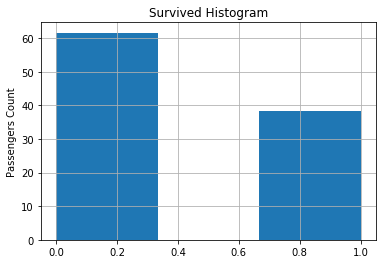

In [160]:
df['Survived'].hist(bins=3, weights=np.ones_like(df['Survived']) * 100. / len(df['Survived']))
plt.xlabel("")
plt.ylabel("Passengers Count")
plt.title("Survived Histogram")


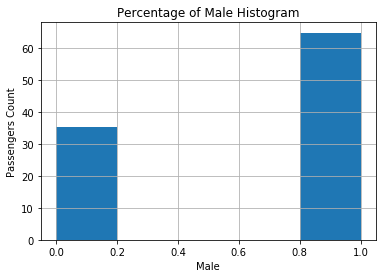

In [161]:
df['Male'].hist(bins=5, weights=np.ones_like(df['Male']) * 100. / len(df['Male']))
plt.xlabel("Male")
plt.ylabel("Passengers Count")
plt.title("Percentage of Male Histogram")


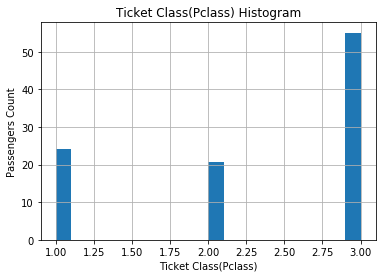

In [162]:
# https://stackoverflow.com/a/34756965/720276
df['Pclass'].hist(bins=20, weights=np.ones_like(df['Pclass']) * 100. / len(df['Pclass']))
plt.xlabel("Ticket Class(Pclass)")
plt.ylabel("Passengers Count")
plt.title("Ticket Class(Pclass) Histogram")


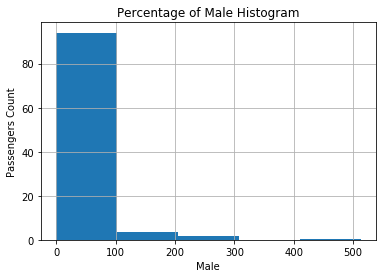

In [163]:
df['Fare'].hist(bins=5, weights=np.ones_like(df['Fare']) * 100. / len(df['Fare']))
plt.xlabel("Male")
plt.ylabel("Passengers Count")
plt.title("Percentage of Male Histogram")


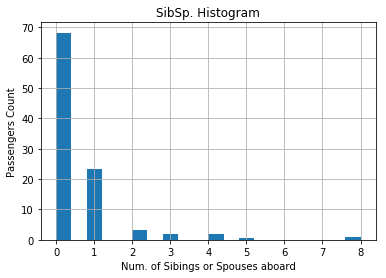

In [164]:
# https://stackoverflow.com/a/34756965/720276
df['SibSp'].hist(bins=20, weights=np.ones_like(df['SibSp']) * 100. / len(df['SibSp']))
plt.xlabel("Num. of Sibings or Spouses aboard")
plt.ylabel("Passengers Count")
plt.title("SibSp. Histogram")


* From this histogram we can see most people(more than 65%) are without siblings or spouses aboard. 
* About 20% has 1 siblings or spouse aboard.


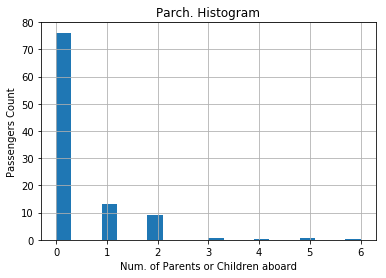

In [165]:
df['Parch'].hist(bins=20, weights=np.ones_like(df['Parch']) * 100. / len(df['Parch']))
plt.xlabel("Num. of Parents or Children aboard")
plt.ylabel("Passengers Count")
plt.title("Parch. Histogram")


* From this histogram we can see most people(more than 75%) are without parents or children aboard. 
* About 12% has 1 parent of child aboard.
* About 9% has 2 parents of children aboard.


* About 65% is Male.

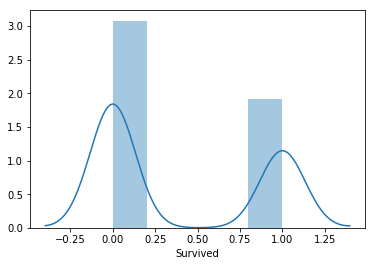

In [166]:
sns.distplot(df['Survived'], norm_hist=True)

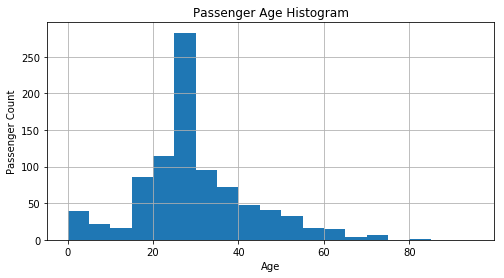

In [167]:
age.hist(bins = np.arange(0, 100, 5), figsize = (8, 4))
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.title("Passenger Age Histogram")

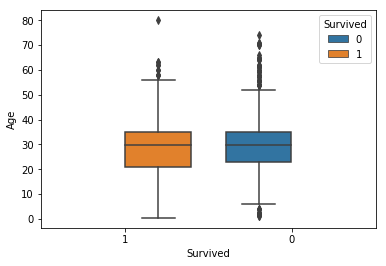

In [168]:
sns.boxplot(x="Survived", y="Age", hue="Survived", data=new_df, order=[1, 0] ) 


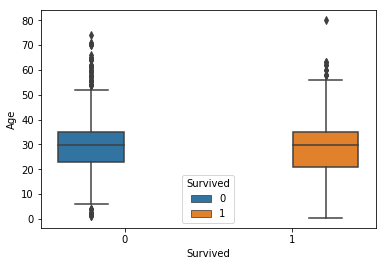

In [169]:
sns.boxplot(x="Survived", y="Age", hue="Survived", data=new_df, order=[0,1] ) 



In [170]:
# to split survived and deceased.
def split_survived(data, attr):
    survived = data[data['Survived'] == 1][attr]
    deceased = data[data['Survived'] == 0][attr]
    return survived, deceased


count    342.000000
mean       1.950292
std        0.863321
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
count    549.000000
mean       2.531876
std        0.735805
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


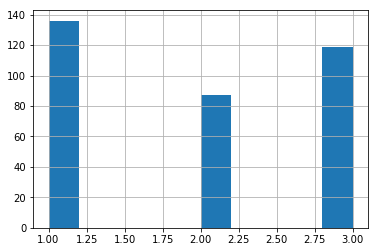

In [171]:
survived_class, deceased_class = split_survived(new_df, 'Pclass')

print( survived_class.describe() )
print( deceased_class.describe() )

survived_class.hist()


### Multiple-variable (2d) explorations

* A survived passenger has 'Survived' column value 1, and a deceased passnger has value 0.
So we can get the survival rate by taking the mean of the sum of 'Survived' value.


In [172]:
Male_survived = new_df[['Male', 'Survived']].groupby(['Male'],as_index=False)
# un-comment next line to see the intuition.
print( Male_survived.head() )
Male_survived = new_df[['Male', 'Survived']].groupby(['Male'],as_index=True).mean()
# print( Male_survived ) 
Male_survived.plot.bar()
plt.xlabel("Male Survived")
plt.ylabel("Percentage")
plt.title("Male Survived Histogram")


KeyError: "['Male'] not in index"

In [ ]:
Pclass_survived = new_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False)
# un-comment next line to see the intuition.
print( Pclass_survived.head() )
Pclass_survived = new_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean()
# print( Pclass_survived ) 

Pclass_survived.plot.bar()



In [ ]:
new_df['Survived'].hist(by=new_df['Pclass'])

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df);

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data= df[ 'S' == df['Embarked'] ]);

In [ ]:
sex_survived = new_df[['Sex', 'Survived']].groupby(['Sex'],as_index=False)
#print( sex_survived.head() )
sex_survived = new_df[['Sex', 'Survived']].groupby(['Sex'],as_index=True).mean()
#print( sex_survived ) 
sex_survived.plot.bar()


In [ ]:
SibSp_survived = new_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False)
#to verify I'm doing correctly.
#print( SibSp_survived.head() )
SibSp_survived = new_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=True).mean()
#print( SibSp_survived ) 
SibSp_survived.plot.bar()


In [ ]:
def hasSib(sib):
    if sib > 0:
        return 1
    elif (sib == 0):
        return 0

new_df['hasSib'] = new_df['SibSp'].apply(hasSib)
#to verify I'm doing correctly.
#new_df[['SibSp', 'hasSib'] ]

In [ ]:
hasSib_survived = new_df[['hasSib', 'Survived']].groupby(['hasSib'],as_index=False)
print( hasSib_survived.head() )
hasSib_survived = new_df[['hasSib', 'Survived']].groupby(['hasSib'],as_index=True).mean()
print( hasSib_survived ) 
hasSib_survived.plot.bar()


In [ ]:
def hasParentChild(parch):
    if parch > 0:
        return 1
    elif (parch == 0):
        return 0

new_df['hasParch'] = new_df['Parch'].apply(hasParentChild)
#to verify I'm doing correctly.
#new_df[['Parch', 'hasParch'] ]

In [ ]:
embark_survived = new_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False)
#print( embark_survived.head() ) 

embark_survived = new_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index = True ).mean()
#print( embark_survived )
embark_survived.plot.bar()
plt.title('Embarked vs????????')


## Conclusions Phase



From previous phase we can see:
* It seems that female passengers have a significant survival rate of 74%, while male passengers only 18%.
* Passengers having siblings or parent/children have a slightly higher survival rate.
